In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
%matplotlib inline

3
[5 0 4 ... 5 6 8]


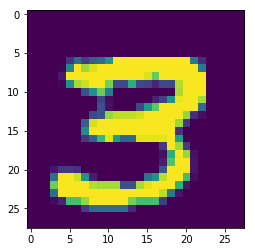

In [10]:
'#load mnist data for hand written digits and split into training and test data'
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

index = 111
print(y_train[index])
plt.imshow(x_train[index])

print(y_train)

In [3]:
'# Reshape training array to 4 dimesions array to make compatible with the keras api'
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

'#Convert values to float'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [4]:
'# Normalizing the RGB codes by dividing it to the max RGB value.'
x_train /= 255
x_test /= 255
input_shape = (28, 28, 1)

In [91]:
'# Building our neural network'
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

'# Display model\'s learnable parameters'
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                302912    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 303,842
Trainable params: 303,842
Non-trainable params: 0
________________________________________________

In [92]:
'#Training the model'
training_history = model.fit(x=x_train,y=y_train, epochs=30, validation_split=0.20, batch_size=100)
print('training done')

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 14s 299us/sample - loss: 0.4557 - accuracy: 0.8938 - val_loss: 0.2277 - val_accuracy: 0.9607
Epoch 2/30
48000/48000 [==============================] - 14s 290us/sample - loss: 0.2422 - accuracy: 0.9548 - val_loss: 0.1737 - val_accuracy: 0.9740
Epoch 3/30
48000/48000 [==============================] - 14s 293us/sample - loss: 0.1998 - accuracy: 0.9633 - val_loss: 0.1528 - val_accuracy: 0.9783
Epoch 4/30
48000/48000 [==============================] - 14s 294us/sample - loss: 0.1764 - accuracy: 0.9693 - val_loss: 0.1401 - val_accuracy: 0.9816
Epoch 5/30
48000/48000 [==============================] - 14s 293us/sample - loss: 0.1643 - accuracy: 0.9714 - val_loss: 0.1328 - val_accuracy: 0.9810
Epoch 6/30
48000/48000 [==============================] - 15s 306us/sample - loss: 0.1551 - accuracy: 0.9725 - val_loss: 0.1366 - val_accuracy: 0.9788
Epoch 7/30
48000/48000 [====================

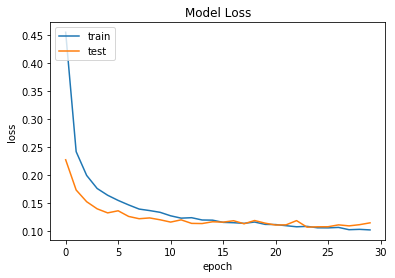

In [104]:
'# Plot training loss'
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

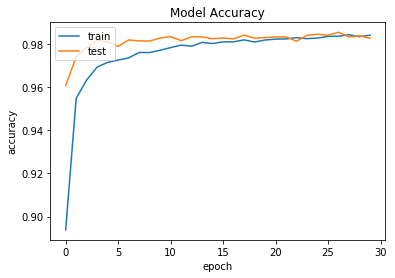

In [105]:
'# Plot accuracy'
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [106]:
'#test the model'
model.evaluate(x=x_test, y=y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.10282903357744216, 0.9862]

Predicted: 1 Confidence Level: 99.93%


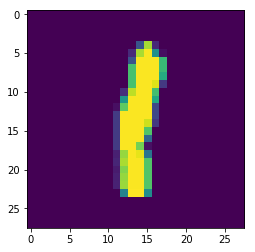

In [96]:
'# Individual predictions'
image_index = 39
plt.imshow(x_test[image_index].reshape(28, 28))
data = x_test[image_index].reshape(1, 28, 28, 1)
pred1 = model.predict_proba(data)

'#print all probabilities of classes to 4dp
def print_probs(array):
    print('Probabilities:')
    for x in array:
        print(round(x, 4)*100)

'#Show prediction and its confidence level'
print("Predicted: %s" % (pred1[0].argmax()) + ' Confidence Level: %s' % round((pred1[0].max() * 100), 2)+ '%')



In [107]:
'# Display confusion matric'
y_pred = model.predict(x_test)
#print(y_test)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred.shape)
cm = confusion_matrix(y_test, y_pred)
print(cm)

(10000,)
[[ 968    1    2    1    2    1    4    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   1    3 1010    3    4    0    0    9    2    0]
 [   0    0    3  996    0    3    0    4    4    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   1    2    0    4    0  878    4    0    3    0]
 [   3    2    0    0    7    3  939    0    4    0]
 [   1    5    7    0    0    0    0 1014    1    0]
 [   0    0    2    1    1    0    1    2  964    3]
 [   2    3    0    3    8    3    0    8    2  980]]


In [108]:
'#Save model'
model.save('C:\\Users\\samuel\\Desktop\\mnist1.h5')

In [113]:
'#Load model'
loaded_model = load_model('C:\\Users\\samuel\\Desktop\\mnist1.h5')

In [114]:
loaded_model.evaluate(x=x_test, y=y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.10282903357744216, 0.9862]

Predicted: 7 Confidence Level: 68.18%
Probabilities:
0.0
31.3400000333786
0.1500000013038516
0.08999999845400453
0.0
0.0
0.0
68.18000078201294
0.009999999747378752
0.2300000051036477


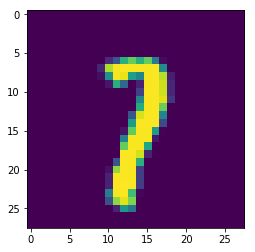

In [142]:
image_index = 111
plt.imshow(x_test[image_index].reshape(28, 28))
data = x_test[image_index].reshape(1, 28, 28, 1)
pred2 = loaded_model.predict_proba(data)

'#Show prediction and its confidence level'
print("Predicted: %s" % (pred2[0].argmax()) + ' Confidence Level: %s' % round((pred2[0].max() * 100), 2)+ '%')

print_probs(pred2[0])